#**HYPERthyroid_dataISM DETECTION MODEL**

##1.INTRODUCTION

Nairobi Hospital conducted a clinical camp to test for hyperthyroid_dataism, the data collected focused on thyroid_data patients
The data collected can be accessed from this *link*

##2.Research Question

Factors predicting whether a patient  has hyperthyroid_dataism or not

##3.Data Cleaning and overview

In [16]:
#HERE WE WILL IMPORT ALL THE LIBRARIES TO BE USED IN THIS NOTEBOOK
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
#Reading the datasets
thyroid_data = pd.read_csv('/content/hypothyroid_data.csv')
thyroid_data

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?


In [7]:
#Preliminary overview of top of dataset
thyroid_data.head(10)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?
5,hypothyroid,85,F,f,f,f,f,t,f,f,f,f,f,f,y,138,y,1.10,y,27,y,1.19,y,23,n,?
6,hypothyroid,64,F,f,f,f,t,f,f,f,f,f,f,f,y,7.70,y,1.30,y,54,y,0.86,y,63,n,?
7,hypothyroid,72,F,f,f,f,f,f,f,f,f,f,f,f,y,21,y,1.90,y,34,y,1.05,y,32,n,?
8,hypothyroid,20,F,f,f,f,f,t,f,f,f,f,f,f,y,92,n,?,y,39,y,1.21,y,32,n,?
9,hypothyroid,42,F,f,f,f,f,f,f,f,f,f,f,f,y,48,n,?,y,7.60,y,1.02,y,7.50,n,?


In [8]:
#Determining no.of records in the dataset
thyroid_data.shape

(3163, 26)

In [9]:
#Summary Statistics
thyroid_data.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163
unique,2,93,3,2,2,2,2,2,2,2,2,2,2,2,2,240,2,70,2,269,2,159,2,281,2,53
top,negative,?,F,f,f,f,f,f,f,f,f,f,f,f,y,0,y,?,y,?,y,?,y,?,n,?
freq,3012,446,2182,2702,3108,3121,3059,2922,2920,3100,3064,3123,3161,3064,2695,894,2468,695,2914,249,2915,248,2916,247,2903,2903


In [10]:
#Basic Overview
thyroid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

In [11]:
#Checking datatypes
thyroid_data.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

In [13]:
# checking out the unique values
thyroid_data.nunique()

status                         2
age                           93
sex                            3
on_thyroxine                   2
query_on_thyroxine             2
on_antithyroid_medication      2
thyroid_surgery                2
query_hypothyroid              2
query_hyperthyroid             2
pregnant                       2
sick                           2
tumor                          2
lithium                        2
goitre                         2
TSH_measured                   2
TSH                          240
T3_measured                    2
T3                            70
TT4_measured                   2
TT4                          269
T4U_measured                   2
T4U                          159
FTI_measured                   2
FTI                          281
TBG_measured                   2
TBG                           53
dtype: int64

In [14]:
# getting a description of the column age
print(thyroid_data['age'].describe())

count     3163
unique      93
top          ?
freq       446
Name: age, dtype: object


In [17]:
# Replacing the "?" values in the data frame
thyroid_data.replace('?', np.nan, inplace=True)

In [18]:
# dropping unnecessary columns
thyroid_data = thyroid_data.drop(columns=['TBG_measured', 'TBG', 'FTI_measured', 'FTI', 'thyroid_surgery', 'T4U_measured', 'T3_measured'])
# checking the shape of the data set after dropping unecessary columns
thyroid_data.shape

(3163, 19)

In [19]:
categorical_feature_mask = thyroid_data.dtypes==object
categorical_cols = thyroid_data.columns[categorical_feature_mask].tolist()
print(categorical_cols)

['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 'query_hypothyroid', 'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre', 'TSH_measured', 'TSH', 'T3', 'TT4_measured', 'TT4', 'T4U']


In [23]:
# converting categorical columns to numerical
thyroid_data['sex'] = thyroid_data['sex'].astype('category')
thyroid_data['sex'] = thyroid_data['sex'].cat.codes

thyroid_data['status'] = thyroid_data['status'].astype('category')
thyroid_data['status'] = thyroid_data['status'].cat.codes

thyroid_data['query_on_thyroxine'] = thyroid_data['query_on_thyroxine'].astype('category')
thyroid_data['query_on_thyroxine'] = thyroid_data['query_on_thyroxine'].cat.codes

thyroid_data['on_thyroxine'] = thyroid_data['on_thyroxine'].astype('category')
thyroid_data['on_thyroxine'] = thyroid_data['on_thyroxine'].cat.codes

thyroid_data['on_antithyroid_medication'] = thyroid_data['on_antithyroid_medication'].astype('category')
thyroid_data['on_antithyroid_medication'] = thyroid_data['on_antithyroid_medication'].cat.codes

thyroid_data['query_hypothyroid'] = thyroid_data['query_hypothyroid'].astype('category')
thyroid_data['query_hypothyroid'] = thyroid_data['query_hypothyroid'].cat.codes

thyroid_data['query_hyperthyroid'] = thyroid_data['query_hyperthyroid'].astype('category')
thyroid_data['query_hyperthyroid'] = thyroid_data['query_hyperthyroid'].cat.codes

thyroid_data['pregnant'] = thyroid_data['pregnant'].astype('category')
thyroid_data['pregnant'] = thyroid_data['pregnant'].cat.codes

thyroid_data['sick'] = thyroid_data['sick'].astype('category')
thyroid_data['sick'] = thyroid_data['sick'].cat.codes

thyroid_data['tumor'] = thyroid_data['tumor'].astype('category')
thyroid_data['tumor'] = thyroid_data['tumor'].cat.codes

thyroid_data['lithium'] = thyroid_data['lithium'].astype('category')
thyroid_data['lithium'] = thyroid_data['lithium'].cat.codes

thyroid_data['goitre'] = thyroid_data['goitre'].astype('category')
thyroid_data['goitre'] = thyroid_data['goitre'].cat.codes
thyroid_data['TSH_measured'] = thyroid_data['TSH_measured'].astype('category')
thyroid_data['TSH_measured'] = thyroid_data['TSH_measured'].cat.codes

thyroid_data['T3'] = thyroid_data['T3'].astype('category')
thyroid_data['T3'] = thyroid_data['T3'].cat.codes

thyroid_data['TSH'] = thyroid_data['TSH'].astype('category')
thyroid_data['TSH'] = thyroid_data['TSH'].cat.codes

thyroid_data['TT4_measured'] = thyroid_data['TT4_measured'].astype('category')
thyroid_data['TT4_measured'] = thyroid_data['TT4_measured'].cat.codes

thyroid_data['TT4'] = thyroid_data['TT4'].astype('category')
thyroid_data['TT4'] = thyroid_data['TT4'].cat.codes

thyroid_data['T4U'] = thyroid_data['T4U'].astype('category')
thyroid_data['T4U'] = thyroid_data['T4U'].cat.codes

thyroid_data.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3,TT4_measured,TT4,T4U
0,0,72,2,0,0,0,0,0,0,0,0,0,0,1,135,8,1,56,117
1,0,15,1,1,0,0,0,0,0,0,0,0,0,1,80,19,1,100,82
2,0,24,2,0,0,0,0,0,0,0,0,0,0,1,1,4,1,194,69
3,0,24,1,0,0,0,0,0,0,0,0,0,0,1,159,6,1,220,73
4,0,77,2,0,0,0,0,0,0,0,0,0,0,1,201,14,1,217,97


In [24]:
# Columns with dtype object
columns = thyroid_data.columns[thyroid_data.dtypes.eq('object')]
print(columns)
# Convert the columns to numeric 
thyroid_data[columns] = thyroid_data[columns].apply(pd.to_numeric, errors='coerce')
# check the changes mad
thyroid_data.dtypes

Index(['age'], dtype='object')


status                          int8
age                          float64
sex                             int8
on_thyroxine                    int8
query_on_thyroxine              int8
on_antithyroid_medication       int8
query_hypothyroid               int8
query_hyperthyroid              int8
pregnant                        int8
sick                            int8
tumor                           int8
lithium                         int8
goitre                          int8
TSH_measured                    int8
TSH                            int16
T3                              int8
TT4_measured                    int8
TT4                            int16
T4U                            int16
dtype: object

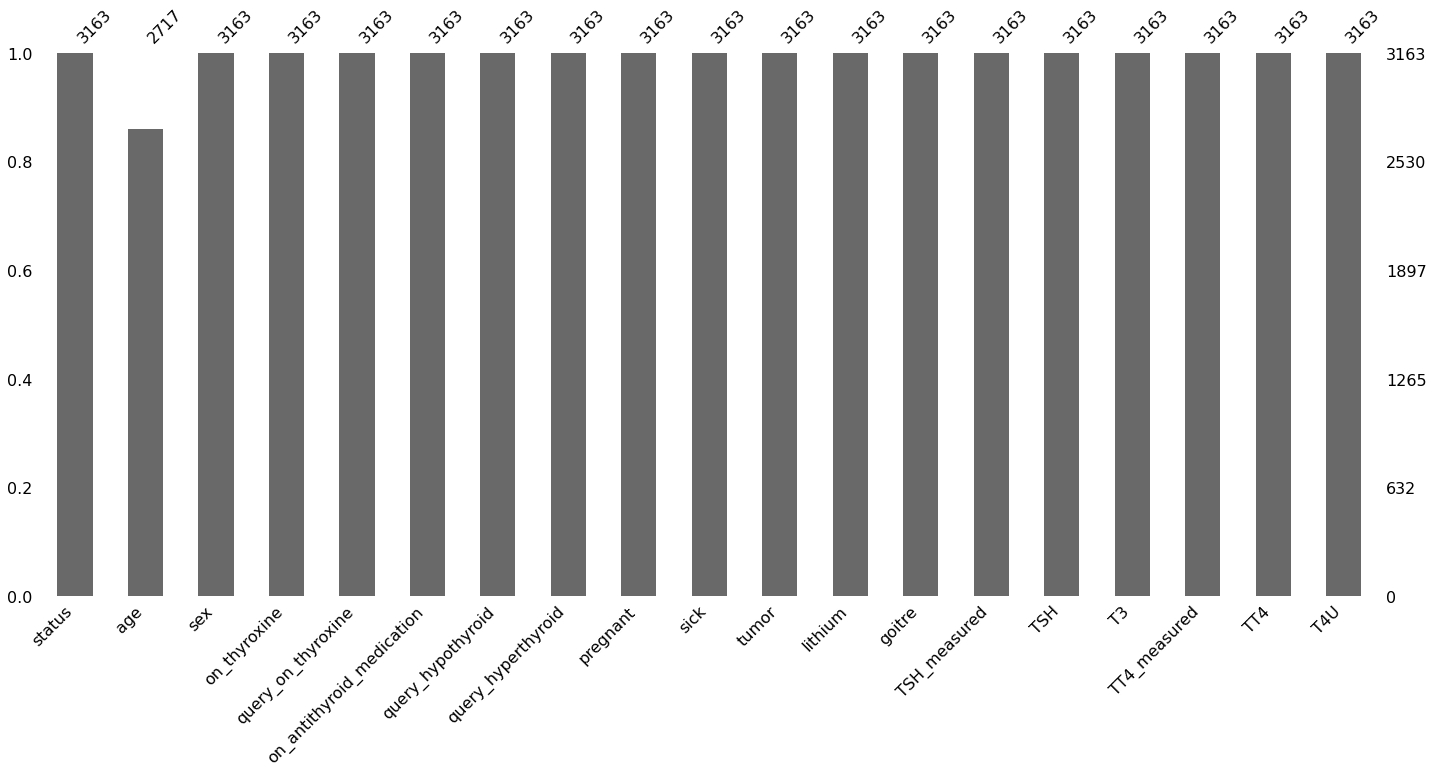

In [25]:
#Missing Data Analysis
#In order to visualize missing value, package missingno is used. 
msno.bar(thyroid_data)
plt.show()

In [28]:
#filling in the missing values for age with the mean
thyroid_data['age'].fillna(thyroid_data['age'].mean(), inplace = True)
#Confirmation of checking of null values
thyroid_data.isnull().sum().any

<bound method Series.any of status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3                           0
TT4_measured                 0
TT4                          0
T4U                          0
dtype: int64>

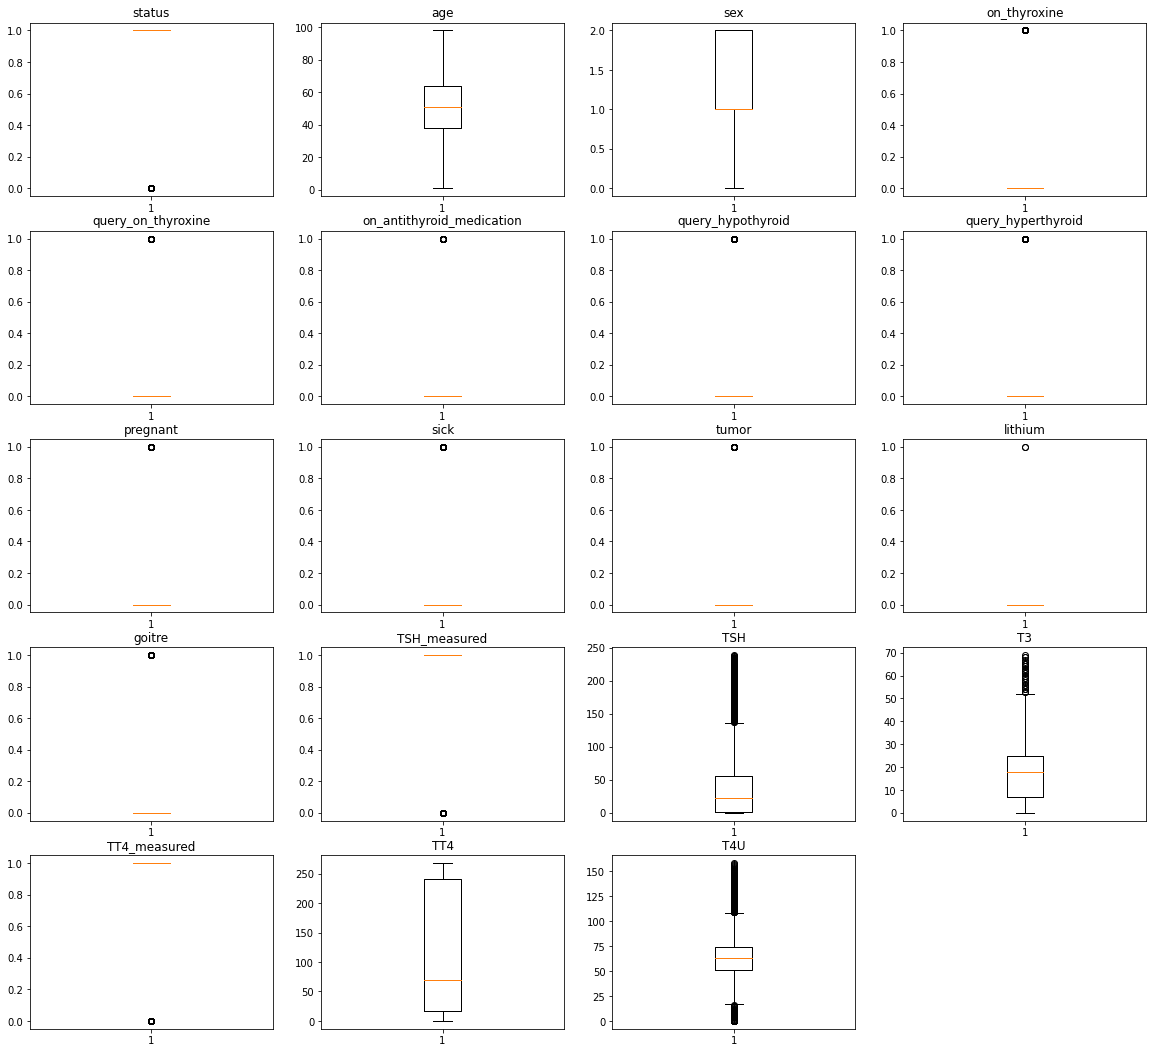

In [29]:
# Checking for Outliers
 
# save the column names onto a dictionary
columns_dict = {'status':1, 'age':2, 'sex':3, 'on_thyroxine':4, 'query_on_thyroxine':5, 'on_antithyroid_medication':6, 
               'query_hypothyroid':7, 'query_hyperthyroid':8, 'pregnant':9, 'sick':10, 'tumor':11, 
                'lithium':12, 'goitre':13, 'TSH_measured':14, 'TSH':15, 'T3':16, 'TT4_measured':17,
                'TT4':18, 'T4U':19}


plt.figure(figsize=(20,30))

# make a boxplot for each numerical column
for variable,i in columns_dict.items():
  plt.subplot(8,4,i)
  plt.boxplot(thyroid_data[variable])
  plt.title(variable)

plt.show()


##Exploratory Data Analysis

###1.Univariate Analysis

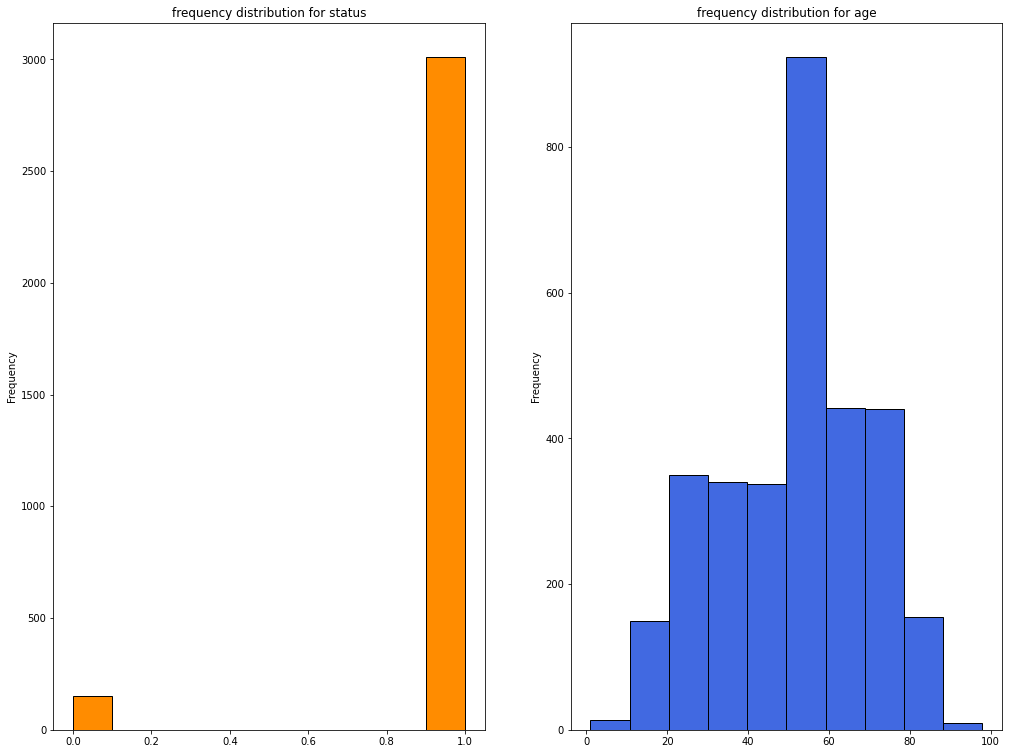

In [30]:
# Histogram to show the distribution of status and age
fig, ax = plt.subplots(1,2, figsize=(17, 13))
thyroid_data['status'].plot.hist(ax=ax[0], bins=10, edgecolor='black', color='darkorange')
ax[0].set_title('frequency distribution for status')

thyroid_data['age'].plot.hist(ax=ax[1], bins=10, edgecolor='black', color='royalblue')
ax[1].set_title('frequency distribution for age')

plt.show()

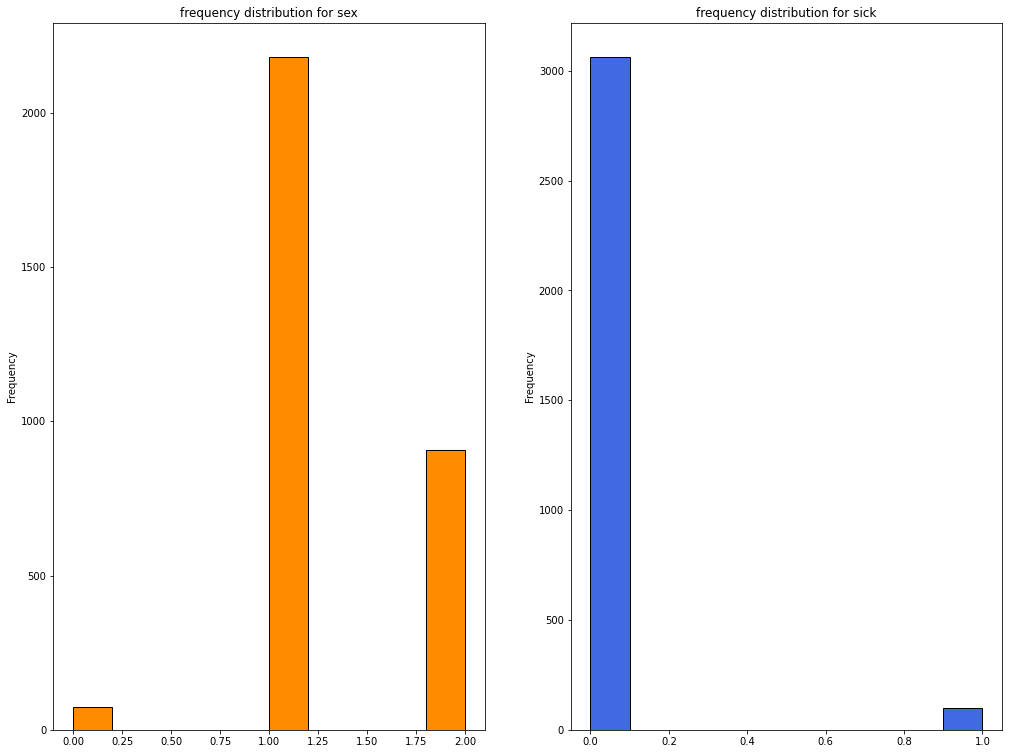

In [32]:
# Histogram to show the distribution of sex and sick
fig, ax = plt.subplots(1,2, figsize=(17, 13))
thyroid_data['sex'].plot.hist(ax=ax[0], bins=10, edgecolor='black', color='darkorange')
ax[0].set_title('frequency distribution for sex')

thyroid_data['sick'].plot.hist(ax=ax[1], bins=10, edgecolor='black', color='royalblue')
ax[1].set_title('frequency distribution for sick')

plt.show()


In [33]:
# checking for the skewness of the data
thyroid_data.skew()
# majority of the data is positively skewed, while a few variables are negatively skewed

status                       -4.244318
age                          -0.175276
sex                           0.468001
on_thyroxine                  2.008884
query_on_thyroxine            7.387730
on_antithyroid_medication     8.508327
query_hypothyroid             3.196349
query_hyperthyroid            3.179507
pregnant                      6.875427
sick                          5.386030
tumor                         8.726972
lithium                      39.749202
goitre                        5.386030
TSH_measured                 -1.983919
TSH                           1.448024
T3                            0.464046
TT4_measured                 -3.130104
TT4                           0.255200
T4U                          -0.080361
dtype: float64

In [34]:
# checking for kurtosis
thyroid_data.kurt()

status                         16.024369
age                            -0.625620
sex                            -0.465073
on_thyroxine                    2.036901
query_on_thyroxine             52.611814
on_antithyroid_medication      70.436172
query_hypothyroid               8.221847
query_hyperthyroid              8.114398
pregnant                       45.300146
sick                           27.026406
tumor                          74.206957
lithium                      1578.997469
goitre                         27.026406
TSH_measured                    1.937159
TSH                             1.232397
T3                              0.621095
TT4_measured                    7.802486
TT4                            -1.733908
T4U                             1.439021
dtype: float64

###2.Bivariate Analysis

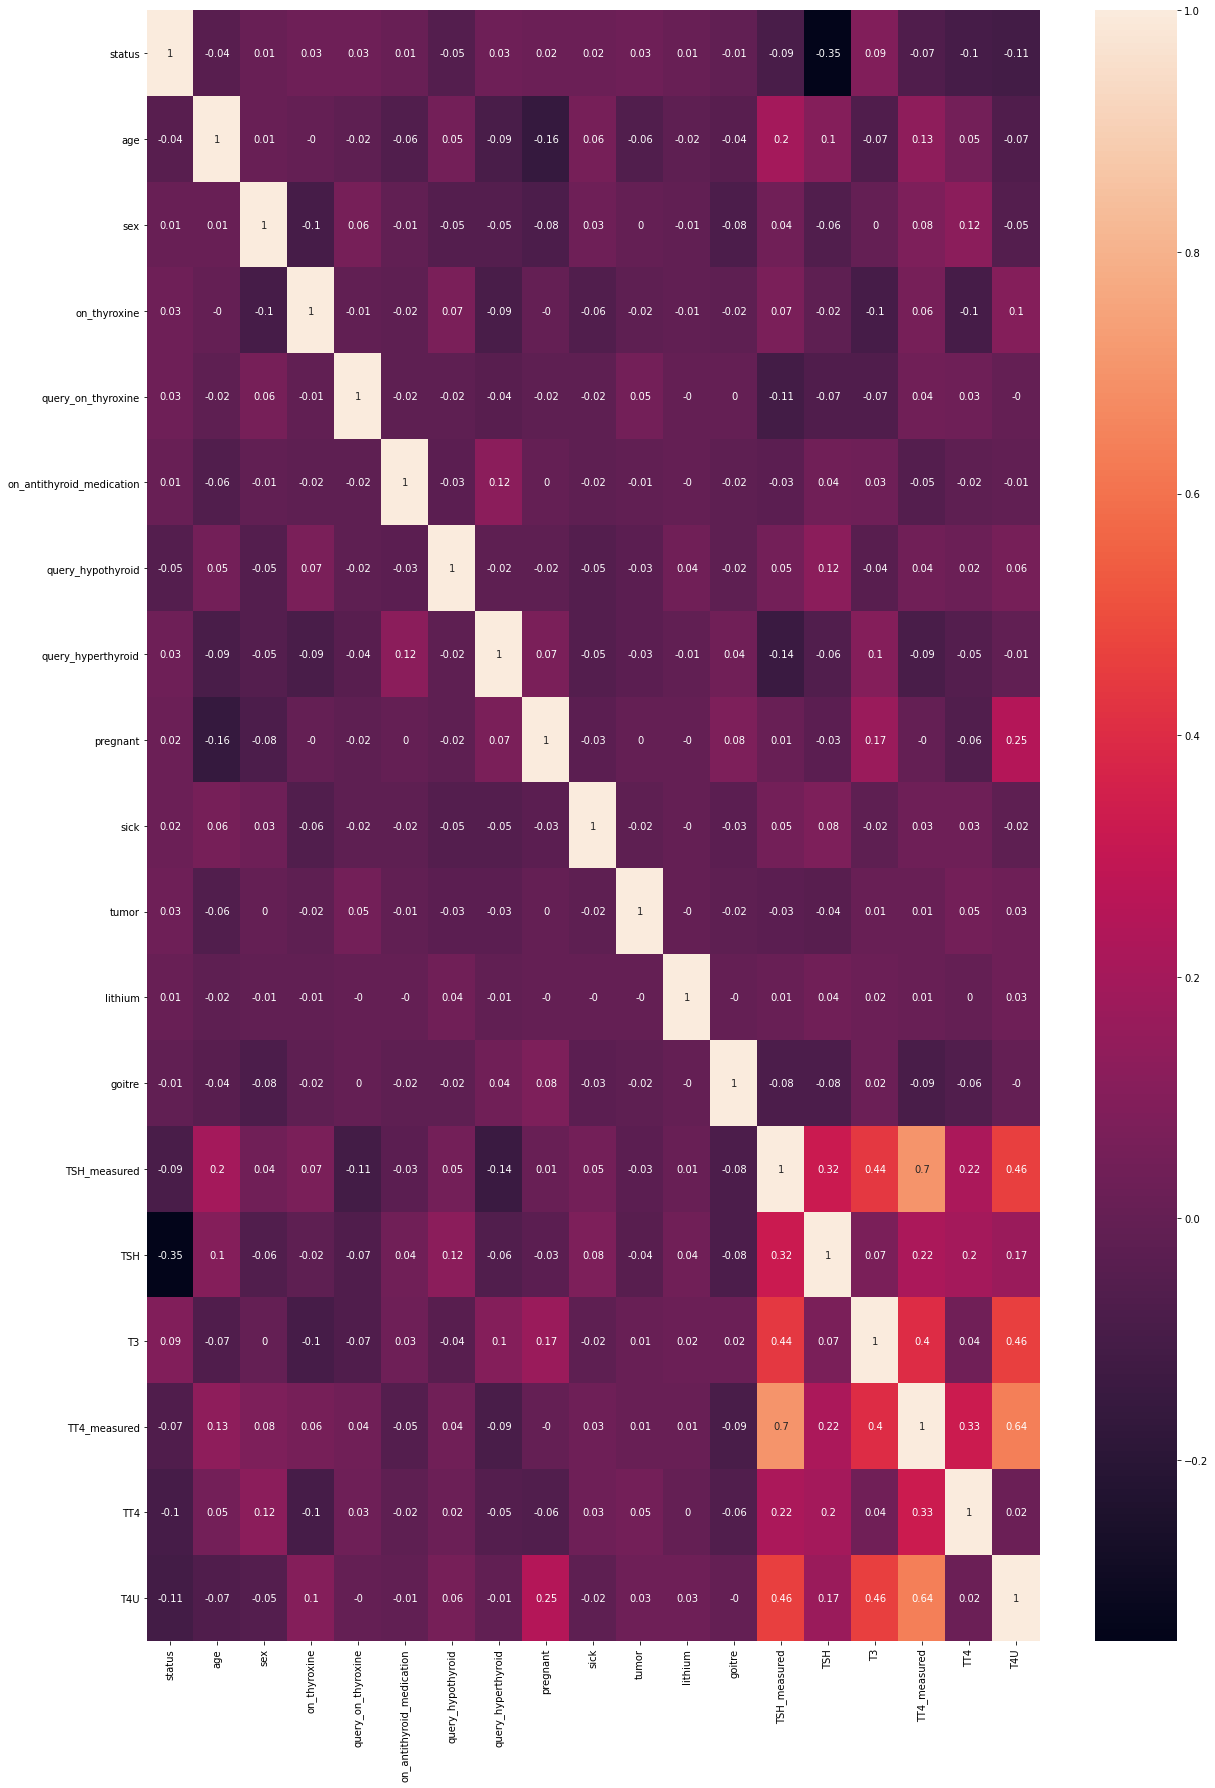

In [35]:
plt.figure(figsize=(20,30))
sns.heatmap(round(thyroid_data.corr(),2), annot=True)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-package

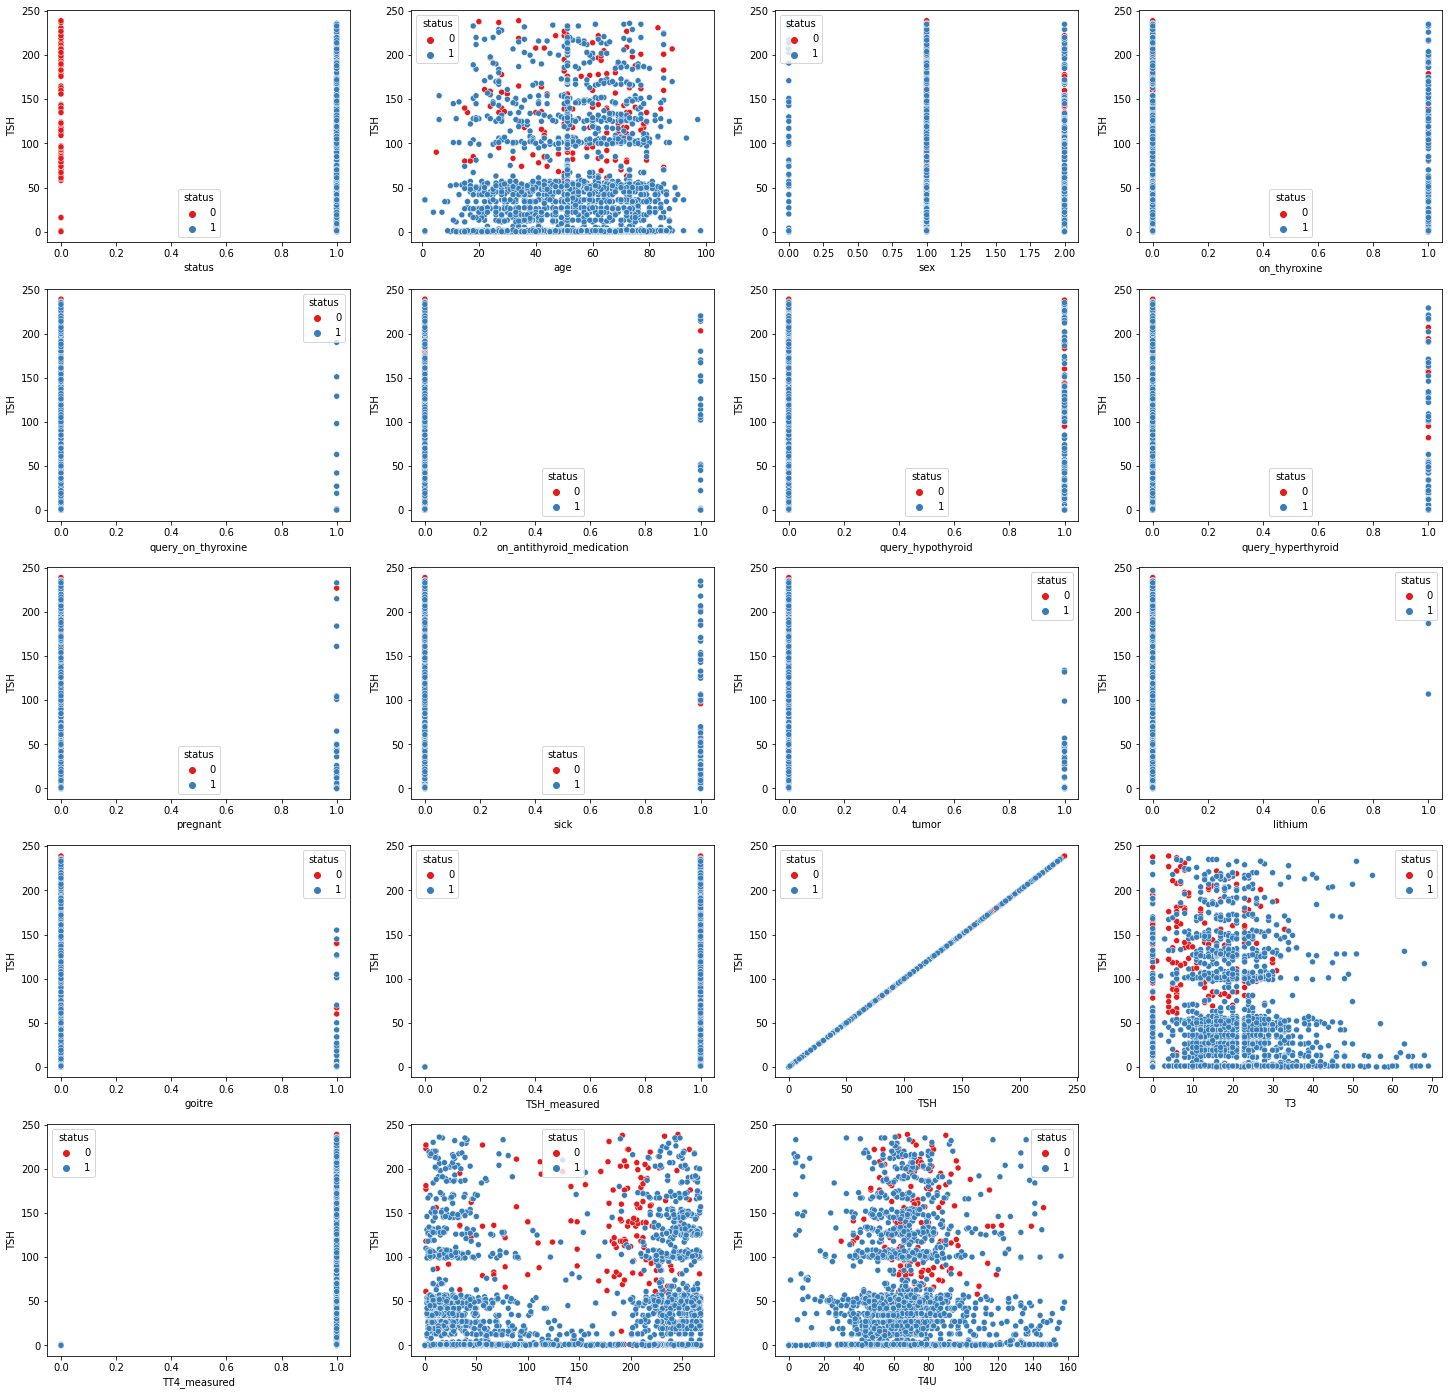

In [37]:
plt.figure(figsize=(25,35))
# for loop to make a scatterplot for each numerical column against TSH 
for variable,i in columns_dict.items():
  plt.subplot(7,4,i)
  x = thyroid_data[variable]
  y = thyroid_data['TSH']
  sns.scatterplot(thyroid_data[variable], thyroid_data['TSH'], palette='Set1', hue=thyroid_data['status'])
  plt.xlabel(variable)
  plt.ylabel('TSH')

the red dots(0) indicate a patient has hyperthroid. as seen from the visualizations, high levels of TT4 and T4U is a major indicator of hyperthyroid.

###Modeling

### Random forest



In [38]:
from sklearn.model_selection import train_test_split
# split the independent and dependant variables
# we want to predict if a patient has hypothyroid
y = thyroid_data['status'].values

test_features = thyroid_data.columns.to_list()
test_features.remove('status')


# using the features
X = thyroid_data[test_features].values

# train using 80% of the features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Import the model
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth=5)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)

comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()

,Actual,Predicted
count,633.000000,633.000000
mean,0.958926,0.998420
std,0.198619,0.039746
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [39]:
from sklearn import metrics

#  assess how well our model performs 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.03949447077409163
Mean Squared Error: 0.03949447077409163
Root Mean Squared Error: 0.19873215837929106


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


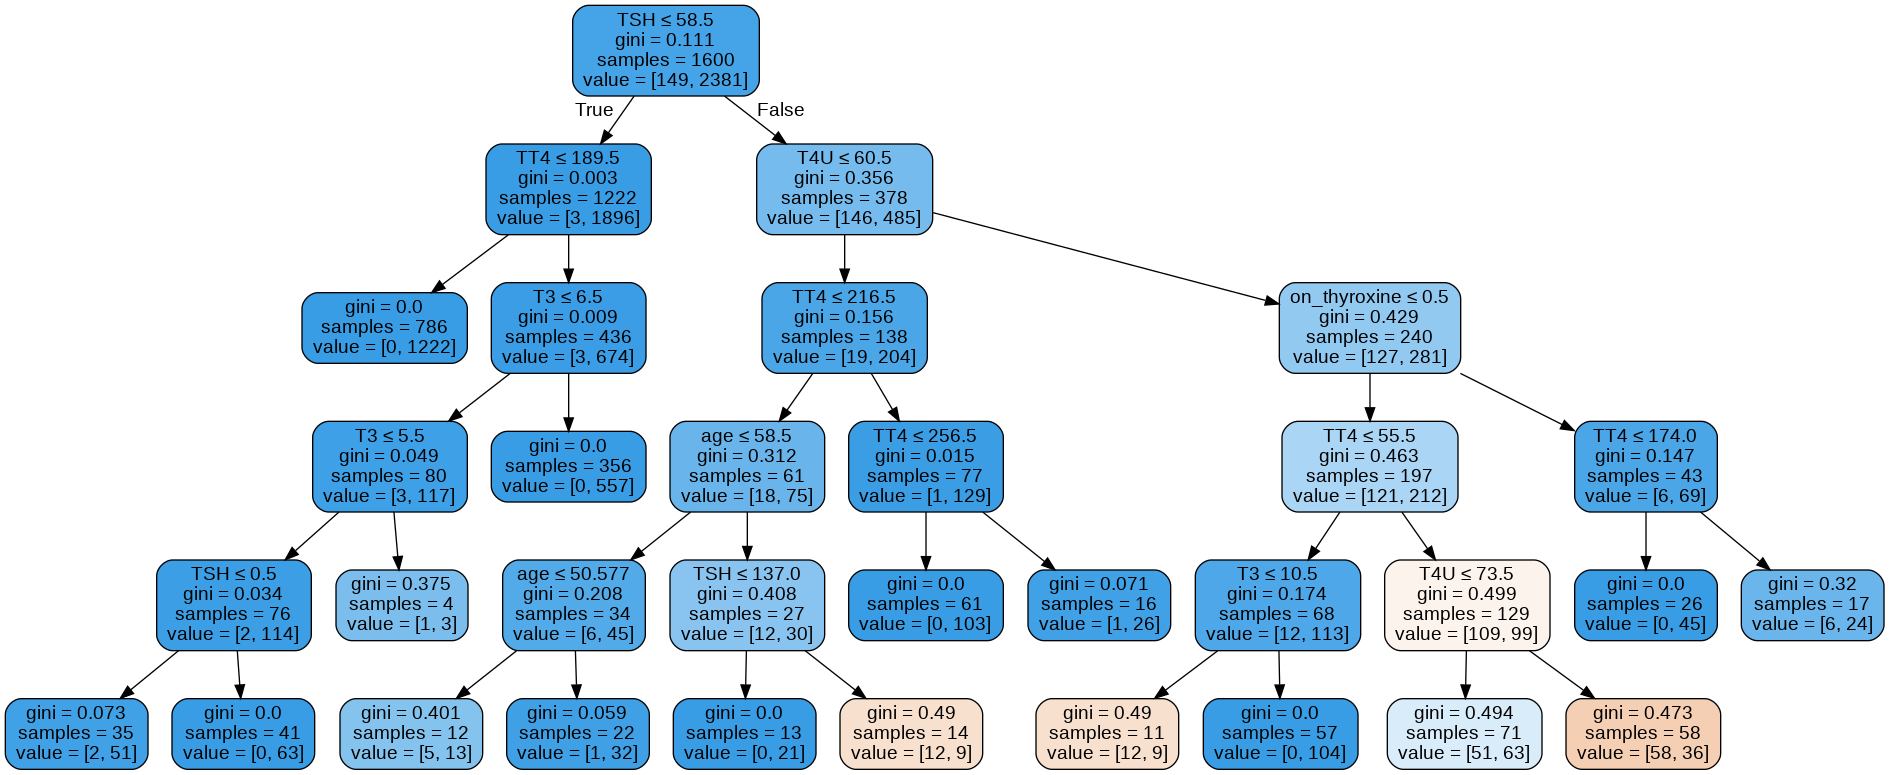

In [40]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('thyroid_forest.png')
Image(graph.create_png())

In [41]:
# Get numerical feature importances
importances = list(tree.feature_importances_)

# We now use some Python magic to connect each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
print()

# Nice to have: We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('age', 0.02), ('sex', 0.0), ('on_thyroxine', 0.07), ('query_on_thyroxine', 0.0), ('on_antithyroid_medication', 0.0), ('query_hypothyroid', 0.0), ('query_hyperthyroid', 0.0), ('pregnant', 0.0), ('sick', 0.0), ('tumor', 0.0), ('lithium', 0.0), ('goitre', 0.0), ('TSH_measured', 0.0), ('TSH', 0.43), ('T3', 0.09), ('TT4_measured', 0.0), ('TT4', 0.25), ('T4U', 0.13)]

Variable: TSH                  Importance: 0.43
Variable: TT4                  Importance: 0.25
Variable: T4U                  Importance: 0.13
Variable: T3                   Importance: 0.09
Variable: on_thyroxine         Importance: 0.07
Variable: age                  Importance: 0.02
Variable: sex                  Importance: 0.0
Variable: query_on_thyroxine   Importance: 0.0
Variable: on_antithyroid_medication Importance: 0.0
Variable: query_hypothyroid    Importance: 0.0
Variable: query_hyperthyroid   Importance: 0.0
Variable: pregnant             Importance: 0.0
Variable: sick                 Importance: 0.0
Variable: t

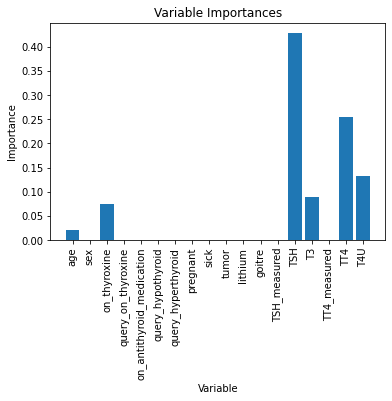

In [42]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt

# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, test_features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

# if we are trying to predict if a patient has hypothyroid, we only need two features, that is TSH and TT4

the most important features include TSH, T3,TT4, T4U, age, and finally the on_thyroxine.

###SVM

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


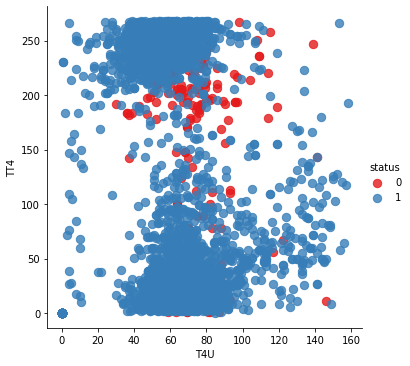

In [43]:
# plotting our desired features for SVM
sns.lmplot('T4U', 'TT4', data=thyroid_data, hue='status', palette='Set1', fit_reg=False, scatter_kws={"s":70})

In [44]:
from sklearn.svm import SVC,LinearSVC

# Fit the model
# Specify the input for the model

TT4_T4U = thyroid_data[['TT4', 'T4U',]].values
type_label = thyroid_data['status'] 
# Fit the model
model = SVC(kernel= 'linear')
model.fit(TT4_T4U,type_label)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


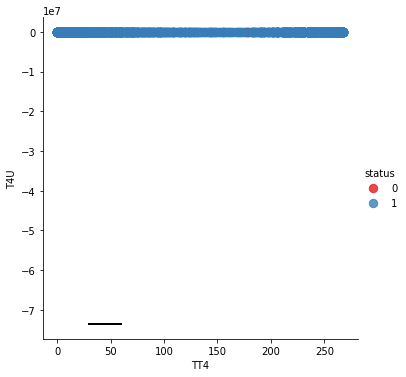

In [45]:
# Get the separating hyperplane
w = model.coef_[0] #get the first coefficient of our model
a = -w[0] / w[1]
# Get the x values of our hyperplane. We achieve this by creating a range numbers from the largest number of the butter vlaues and the smallest number of the butter values.  
xx = np.linspace(30, 60)
yy = a * xx - (model.intercept_[0]) / w[1]

# Plot the hyperplane
sns.lmplot('TT4', 'T4U', data=thyroid_data, hue='status', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black');

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


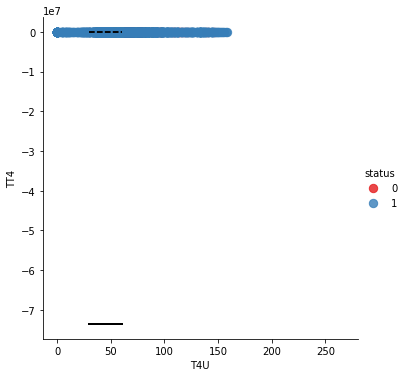

In [47]:
# Plot the parallels to the separating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

# Look at the margins and support vectors
sns.lmplot('T4U', 'TT4', data=thyroid_data, hue='status', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--') #'k--' indicates that we want to draw a black dotted line
plt.plot(xx, yy_up, 'k--')
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],s=80, facecolors='none');